In [1]:
import datetime as datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

#%matplotlib inline

In [2]:
#nivel educativo
postulantes_educacion = pd.read_csv("datos/datos_navent_fiuba/fiuba_1_postulantes_educacion.csv", low_memory=False)

#fecha de nacimiento y genero
postulantes_genero_y_edad = pd.read_csv("datos/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv", low_memory=False)

#vistas de avisos online y offline
vistas = pd.read_csv("datos/datos_navent_fiuba/fiuba_3_vistas.csv", low_memory=False)

#postulaciones hasta el 1ro de marzo 2018
postulaciones = pd.read_csv("datos/datos_navent_fiuba/fiuba_4_postulaciones.csv", low_memory=False)

#avisos online al 8 de marzo de 2018
avisos_online = pd.read_csv("datos/datos_navent_fiuba/fiuba_5_avisos_online.csv", low_memory=False)

#detalle de avisos vistos y postulados tanto offline como online
avisos_detalle = pd.read_csv("datos/datos_navent_fiuba/fiuba_6_avisos_detalle.csv", low_memory=False)

### Se toma las postulaciones de personas que estan estudiando

In [10]:
postulaciones_detalle = pd.merge(postulaciones, postulantes_educacion, on='idpostulante', how='left')

enCurso = (postulaciones_detalle['estado']=='En Curso')

postulaciones_estudiantes = postulaciones_detalle[enCurso]

postulaciones_estudiantes.head()

,idaviso,idpostulante,fechapostulacion,nombre,estado
82,1112261212,NdJl,2018-01-16 08:50:30,Posgrado,En Curso
84,1112273308,NdJl,2018-01-23 07:53:47,Posgrado,En Curso
86,1112281548,NdJl,2018-01-24 05:10:12,Posgrado,En Curso
88,1112260409,NdJl,2018-01-24 05:17:29,Posgrado,En Curso
90,1112293547,NdJl,2018-01-29 15:41:43,Posgrado,En Curso


### Se toman el detalle de los avisos.

<IPython.core.display.Javascript object>


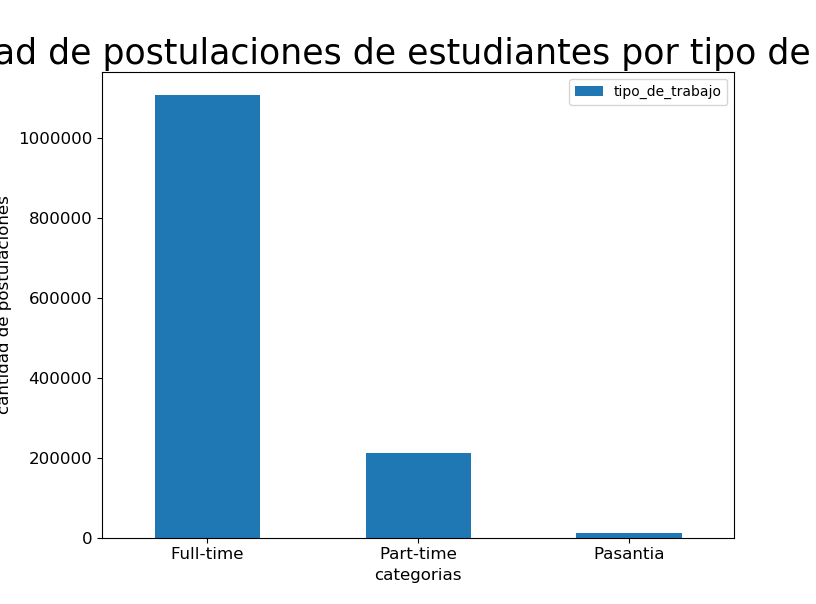

Text(0.5,1,'Cantidad de postulaciones de estudiantes por tipo de trabajo ')

In [12]:
%matplotlib notebook
total = pd.merge(postulaciones_estudiantes, avisos_detalle, on='idaviso', how='left')

total = total[~pd.isnull(total['tipo_de_trabajo'])]
total

grupo = total.groupby('tipo_de_trabajo').agg({'tipo_de_trabajo':'count'}).sort_values('tipo_de_trabajo', ascending = False).head(3)
grupo.plot(kind='bar', figsize=(12,10),rot=0, fontsize= 12,grid = False)
ax=plt.gca()
ax.set_ylabel('cantidad de postulaciones',fontsize=12);
ax.set_xlabel('categorias',fontsize=12)
ax.set_title('Cantidad de postulaciones de estudiantes por tipo de trabajo ',fontsize=25)
